In [31]:
import cv2
import numpy as np

import os
from skimage import io, color, img_as_ubyte
import matplotlib.pyplot as plt


In [32]:
def find_centroid_basic_Rect(image):
    #find contour takes image with 8 bit int and only one channel
    #find contour looks for white object on a black back ground
    # This finds the centroid with the maximum area in the current frame and also the bounding rectangle. - DK 2018_12_12
    imH,imW = image.shape
    contours = cv2.findContours(image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
    centroid=False
    isCentroidFound=False
    bbox = None
    rect = False
    if len(contours)>0:
        # Find contour with max area
        cnt = max(contours, key=cv2.contourArea)
        M = cv2.moments(cnt)

        if M['m00']!=0:
            # Centroid coordinates
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            centroid=np.array([cx,cy])
            isCentroidFound=True

             # Find the bounding rectangle
            xmin,ymin,width,height = cv2.boundingRect(cnt)
            xmin = max(0,xmin)
            ymin = max(0,ymin)
            width = min(width, imW - xmin)
            height = min(height, imH - ymin)
            
            bbox = (xmin, ymin, width, height)

    return isCentroidFound,centroid, bbox

def image_show(image, label, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    ax.imshow(image, cmap='gray') # interpolation = 'lanczos'
    ax.set_title(label)
    ax.axis('on')
    return fig, ax

<ipython-input-33-3e1ce67c3c58>:16: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  trial = color.rgb2gray(read_image)  #io.imread is better than plt.imread as it prevents data loss in coversion


(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:title={'center':'trial8'}>)

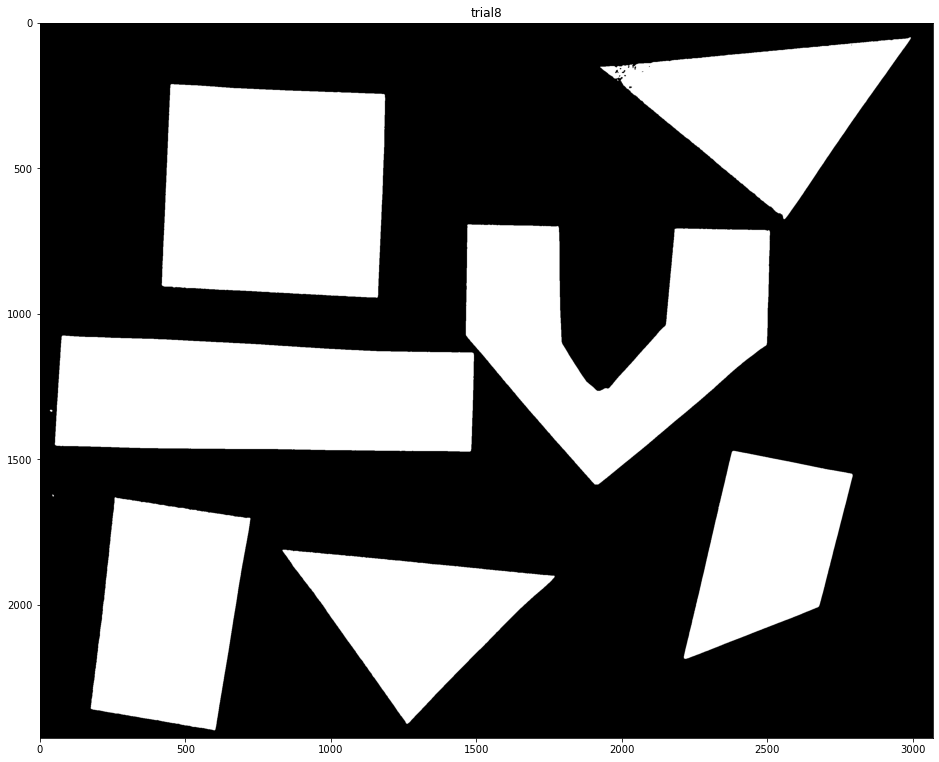

In [33]:
path = 'E:\H_Drive\Github Repos\Cuttlefish-Research\Testing'

# enter scale factor for physical calculation of values
# 0x          247px               1000 microns          = 4.049 microns/pixel
# 1x          417px               1000 microns          = 2.398 microns/pixel
# 2x          834px               1000 microns          = 1.199 microns/pixel
scale = 2.398  # in microns/pixel  as all the datasets are 1x
t_scale = 1  # in secs, represents the time step between consecutive frames
disk_sz = 1  # disk size for median filter, need enough smoothening but not too large to make it unable to detect features
thresh_val = 120 # goal is to select a threshold that minimizes the corner dark regions and maximizes animal area
#make sure to get the most of the boundaries of the animal while selecting the threshold

img_collec = os.listdir(path)
image = '06-junk-mask.png' #path + '\\' + img_collec[0]
read_image = io.imread(image)
trial = color.rgb2gray(read_image)  #io.imread is better than plt.imread as it prevents data loss in coversion

trial8 = img_as_ubyte(trial)

image_show(trial8, 'trial8')

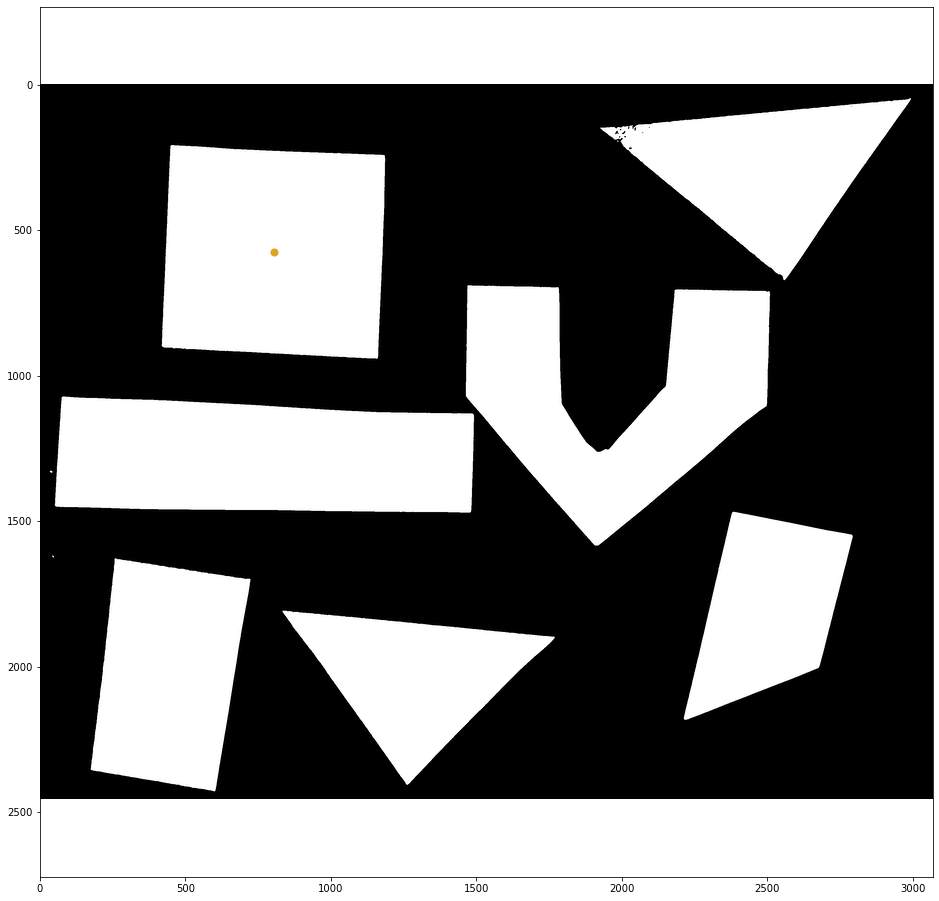

In [36]:
isCentroidFound,centroid, bbox = find_centroid_basic_Rect(trial8)

fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(trial8, cmap=plt.cm.gray, interpolation = 'lanczos')
plt.axis('equal')

ax.scatter([centroid[0]],[centroid[1]], marker = 'o', color ='goldenrod', s=50)